In [1]:
import dkist
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.wcs import WCS
import astropy.units as u   
import numpy as np
import sunpy.visualization
from sunpy.visualization import drawing
from sunpy.coordinates import propagate_with_solar_surface, SphericalScreen
import sunpy.map

In [2]:
dkist.__version__

'1.11.0'

In [3]:
ci_filepath = "~/work/pid_2_21/BOEPQ/"
ci_dataset = dkist.load_dataset(ci_filepath)

In [4]:
ci_dataset

This CRYO-NIRSP Dataset BOEPQ consists of 1936 frames.
Files are stored in /cluster/home/zhuyin/work/pid_2_21/BOEPQ

This Dataset has 5 pixel and 4 world dimensions.

The data are represented by a <class 'dask.array.core.Array'> object:
dask.array<reshape, shape=(4, 121, 4, 1889, 1754), dtype=float32, chunksize=(1, 1, 1, 1889, 1754), chunktype=numpy.ndarray>

Array Dim  Axis Name           Data size  Bounds
        0  polarization state          4  None
        1  scan step number          121  None
        2  measurement number          4  None
        3  detector x axis          1889  None
        4  detector y axis          1754  None

World Dim  Axis Name                  Physical Type                   Units
        3  stokes                     phys.polarization.stokes        unknown
        2  time                       time                            s
        1  helioprojective latitude   custom:pos.helioprojective.lat  arcsec
        0  helioprojective longitude  custom:pos.h

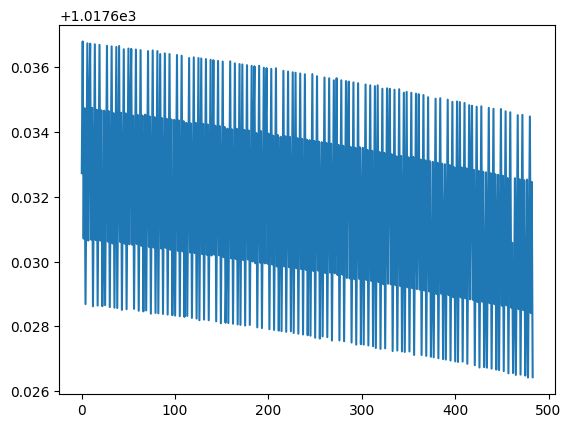

In [5]:
plt.plot(ci_dataset.headers[:121*4]['CRVAL1'])
# crval1 does not vary 

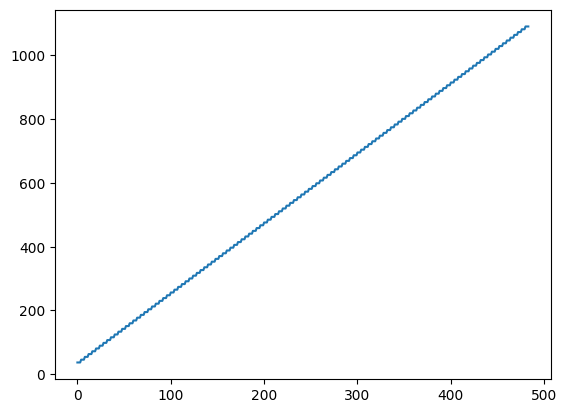

In [6]:
plt.plot(ci_dataset.headers[:121*4]['CRPIX1'])
# crpix1 does vary 

In [7]:
np.where(ci_dataset.headers["STOKES"] == "I")
# first 484 (121 slit pos * 4 measurements per slit pos) frames are Stokes I frames

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [8]:
# create a blank map

data = np.full((10, 10), np.nan)

# Define a reference coordinate and create a header using sunpy.map.make_fitswcs_header
skycoord = SkyCoord(950*u.arcsec, -250*u.arcsec, obstime=ci_dataset.headers[0]['DATE-BEG'],
                    observer="earth", frame="helioprojective")

# Scale set to the following for solar limb to be in the field of view
header = sunpy.map.make_fitswcs_header(data, skycoord, scale=[30, 30]*u.arcsec/u.pixel)

# Use sunpy.map.Map to create the blank map
blank_map = sunpy.map.Map(data, header)

Set MJD-BEG to 60425.783681 from DATE-BEG.
Set MJD-AVG to 60425.783723 from DATE-AVG.
Set MJD-END to 60425.783765 from DATE-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    20.706700 from OBSGEO-[XYZ].
Set OBSGEO-H to     3063.997 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


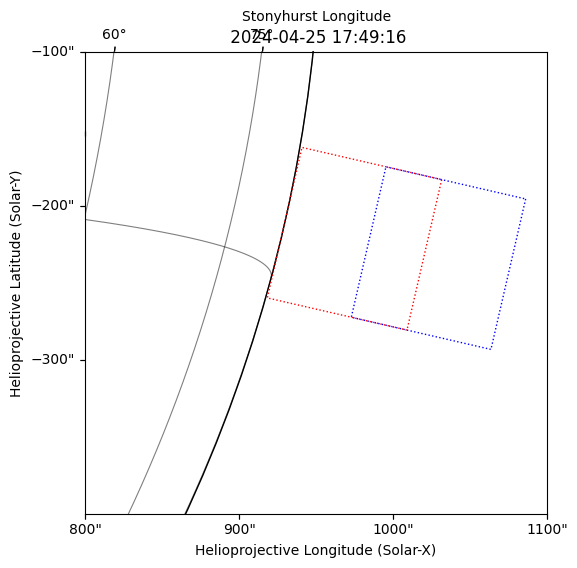

In [9]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection=blank_map)
blank_map.plot(axes=ax)
blank_map.draw_limb(axes=ax, color="k")
blank_map.draw_grid(axes=ax, color="k")

wcs_from_dataset = ci_dataset[0,120,0,:,:].wcs
wcs_from_header = WCS(ci_dataset.headers[120*4]).celestial

with SphericalScreen(blank_map.observer_coordinate):
    drawing.extent(axes=ax, wcs=wcs_from_dataset, color="r")
    drawing.extent(axes=ax, wcs=wcs_from_header, color="b")

In [18]:
# they do not produce the same results
print(wcs_from_dataset.pixel_to_world(0, 0).Tx, wcs_from_dataset.pixel_to_world(0, 0).Ty)
print(wcs_from_header.pixel_to_world(0, 0).Tx, wcs_from_header.pixel_to_world(0, 0).Ty)

1031.51 arcsec -183.174 arcsec
1086 arcsec -195.715 arcsec


In [19]:
# it seems that the wcs from the dataset object does not vary with time
for ii in range(0, 121, 10):
    print(ci_dataset[0,ii,0,:,:].wcs.pixel_to_world(0, 0).Tx, ci_dataset[0,ii,0,:,:].wcs.pixel_to_world(0, 0).Ty)

1031.51 arcsec -183.175 arcsec
1031.51 arcsec -183.175 arcsec
1031.51 arcsec -183.175 arcsec
1031.51 arcsec -183.175 arcsec
1031.5 arcsec -183.175 arcsec
1031.51 arcsec -183.175 arcsec
1031.5 arcsec -183.175 arcsec
1031.5 arcsec -183.174 arcsec
1031.5 arcsec -183.175 arcsec
1031.5 arcsec -183.175 arcsec
1031.5 arcsec -183.175 arcsec
1031.5 arcsec -183.174 arcsec
1031.51 arcsec -183.174 arcsec
